# Proyek: Menyelesaikan Permasalahan HR

- Nama: Dina Nabila
- Email: dinanabb@gmail.com
- Id Dicoding: dinanabila

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# untuk encoding, normalisasi, preprocessor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
# untuk oversampling
from imblearn.over_sampling import SMOTE
# untuk split dataset
from sklearn.model_selection import train_test_split
# untuk model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# untuk evaluasi model klasifikasi
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
# untuk bikin pipeline
from sklearn.pipeline import Pipeline
# untuk simpan model
import joblib

### Menyiapkan data yang akan digunakan

In [ ]:
df = pd.read_csv('employee_data.csv')
df.head(2)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0


## Data Understanding

In [ ]:
df.info()
print(f'Jumlah duplikasi data: {df.duplicated().sum()}')
print(f'Jumlah missing value: {df.isna().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
threshold = 10  # contoh ambang batas
print("DATA KATEGORIKAL")
print("Nama Kolom: jumlah nilai unik")
print("=============================")
for col in df.columns:
    if df[col].nunique() <= threshold:
        print(f"{col}: {df[col].nunique()}")

DATA KATEGORIKAL
Nama Kolom: jumlah nilai unik
Attrition: 2
BusinessTravel: 3
Department: 3
Education: 5
EducationField: 6
EmployeeCount: 1
EnvironmentSatisfaction: 4
Gender: 2
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TrainingTimesLastYear: 7
WorkLifeBalance: 4


**Data Kategorikal:**
- **BusinessTravel** - frekuensi perjalanan dinas selama kerja
- **Department** - departemen pegawai
- **Education** - jenjang pendidikan terakhir (1: Bawah Diploma, 2: Diploma, 3: Sarjana, 4: Magister, 5: Doktor)
- **EducationField** - jurusan pendidikan
- **EmployeeCount**
- **EnvironmentSatisfaction** - tingkat kepuasan terhadap lingkungan kerja (1: Rendah, 2: Sedang, 3: Tinggi, 4: Sangat Tinggi)
- **Gender**: gender pegawai (Male / Female)
- **JobInvolvement** - tingkat keterlibatan dalam kerja (1: Rendah, 2: Sedang, 3: Tinggi, 4: Sangat Tinggi)
- **JobLevel** - level of job (1 sampai 5)
- **JobRole** - job roles
- **JobSatisfaction** - tingkat kepuasan terhadap pekerjaan (1: Rendah, 2: Sedang, 3: Tinggi, 4: Sangat Tinggi)
- **MaritalStatus** - status pernikahan (Married / Single)
- **NumCompaniesWorked** - jumlah perusahaan yang pernah menjadi tempat bekerja
- **Over18** - apakah usia pegawai di atas 18? (Y/N)
- **OverTime** - overtime? (Yes/No)
- **PerformanceRating** - tingkat hasil kinerja pegawai (1: Rendah, 2: Sedang, 3: Tinggi, 4: Sangat Tinggi)
- **RelationshipSatisfaction**: tingkat kepuasan terhadap hubungan (1: Rendah, 2: Sedang, 3: Tinggi, 4: Sangat Tinggi)
- **StandardHours** - jumlah jam kerja normal per minggu
- **StockOptionLevel** - tingkat stock option (tingkat hak yang diberikan kepada pegawai untuk membeli saham perusahaan tempatnya bekerja)
- **TrainingTimesLastYear** - jumlah pelatihan yang dihadiri tahun lalu
- **WorkLifeBalance**: tingkat keseimbangan work dan life (1: Rendah, 2: Sedang, 3: Tinggi, 4: Sangat Tinggi)


<br>

**Data Numerikal:**
- **EmployeeId** - Id pegawai
- **Age** - usia pegawai
- **DailyRate** - gaji harian
- **DistanceFromHome** - jarak rumah ke tempat kerja (km)
- **HourlyRate** - gaji per jam
- **MonthlyIncome**	- gaji bulanan
- **MonthlyRate**	- monthly rate (mungkin rate gaji maksimum berdasarkan jabatan)
- **PercentSalaryHike** - persentase peningkatan gaji dari tahun lalu
- **TotalWorkingYears** - total tahun bekerja
- **YearsAtCompany** - jumlah tahun bekerja di perusahaan
- **YearsInCurrentRole** - jumlah tahun bekerja di jabatan sekarang
- **YearsSinceLastPromotion**	- jumlah tahun bekerja semenjak promosi terakhir
- **YearsWithCurrManager** - jumlah tahun bekerja dengan manajer sekarang


<br>

**Data Target:**
- **Attrition** - apakah pegawai resign / tidak lanjut bekerja di perusahaan? (0: tidak, 1: ya)


<br>


**Insight:** <br>
Terdapat 412 missing value dari kolom Attrition. Barangkali itu data karyawan baru? Bila demikian, kita bisa prediksi nilai Attrition-nya pakai model machine learning supervised klasifikasi. Tapi sebelum itu, kita eksplorasi dulu datanya.

Biar kenal.

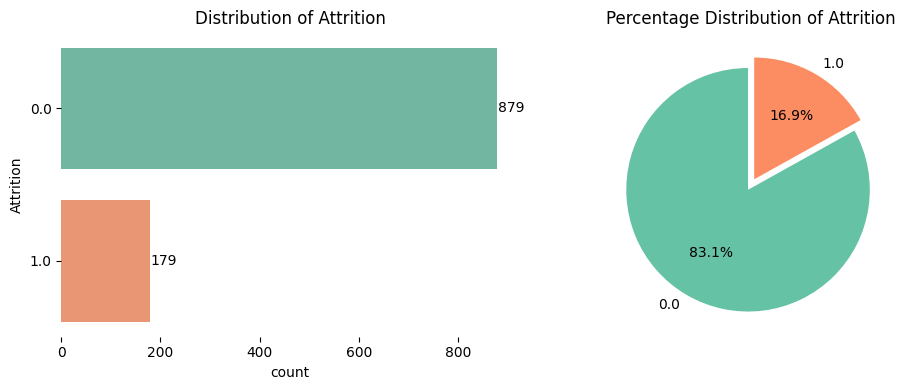

In [ ]:
column_name = 'Attrition'
plt.figure(figsize=(10, 4))

# first subplot: count plot
plt.subplot(1, 2, 1)
sns.countplot(y=column_name, hue=column_name, legend=False, data=df, palette='Set2')
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# second subplot: Pie chart
plt.subplot(1, 2, 2)
df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.05]*df[column_name].nunique())
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# list berisi data kategorikal
categorical_columns = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

# list berisi data numerikal
numerical_columns = ['EmployeeId', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

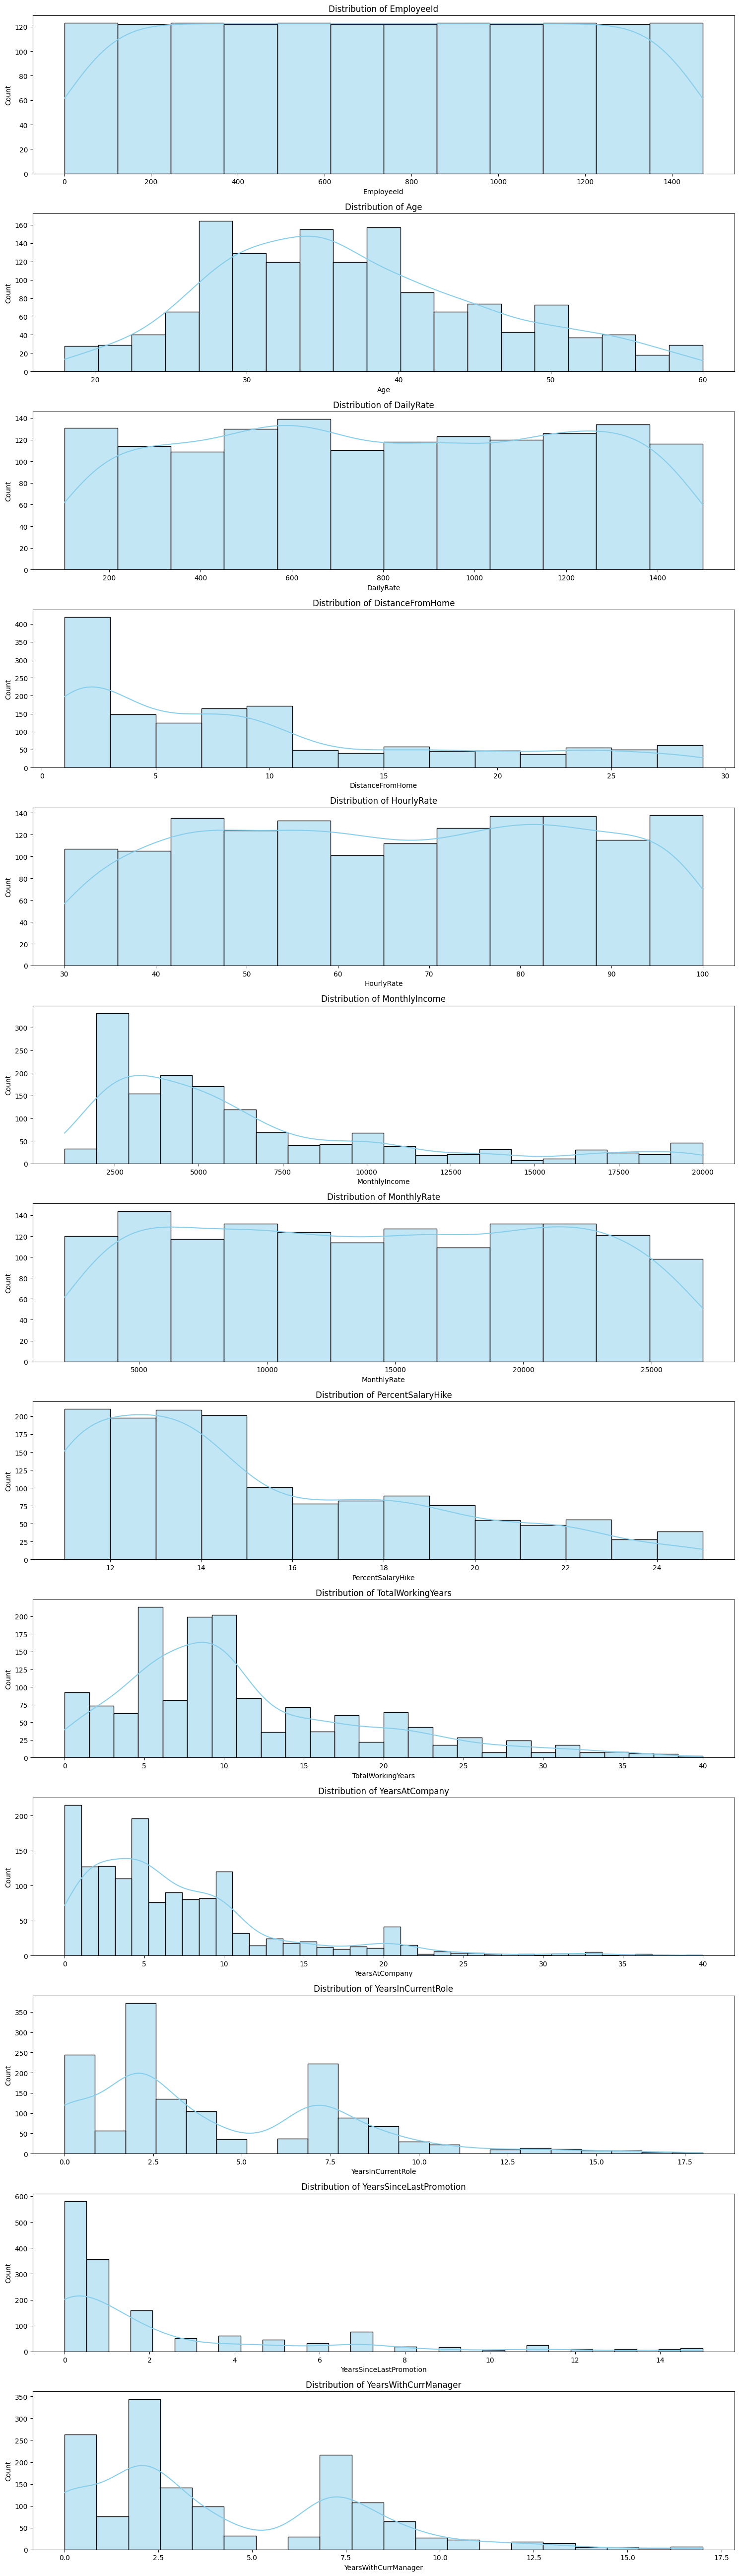

In [ ]:
# ==============================
# plot distribusi data numerikal
# ==============================

plt.figure(figsize=(15, 4 * len(numerical_columns)))
for i, col in enumerate(numerical_columns):
  plt.subplot(len(numerical_columns), 1, i + 1)
  sns.histplot(df[col], kde=True, color='skyblue')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.tight_layout()
plt.show()

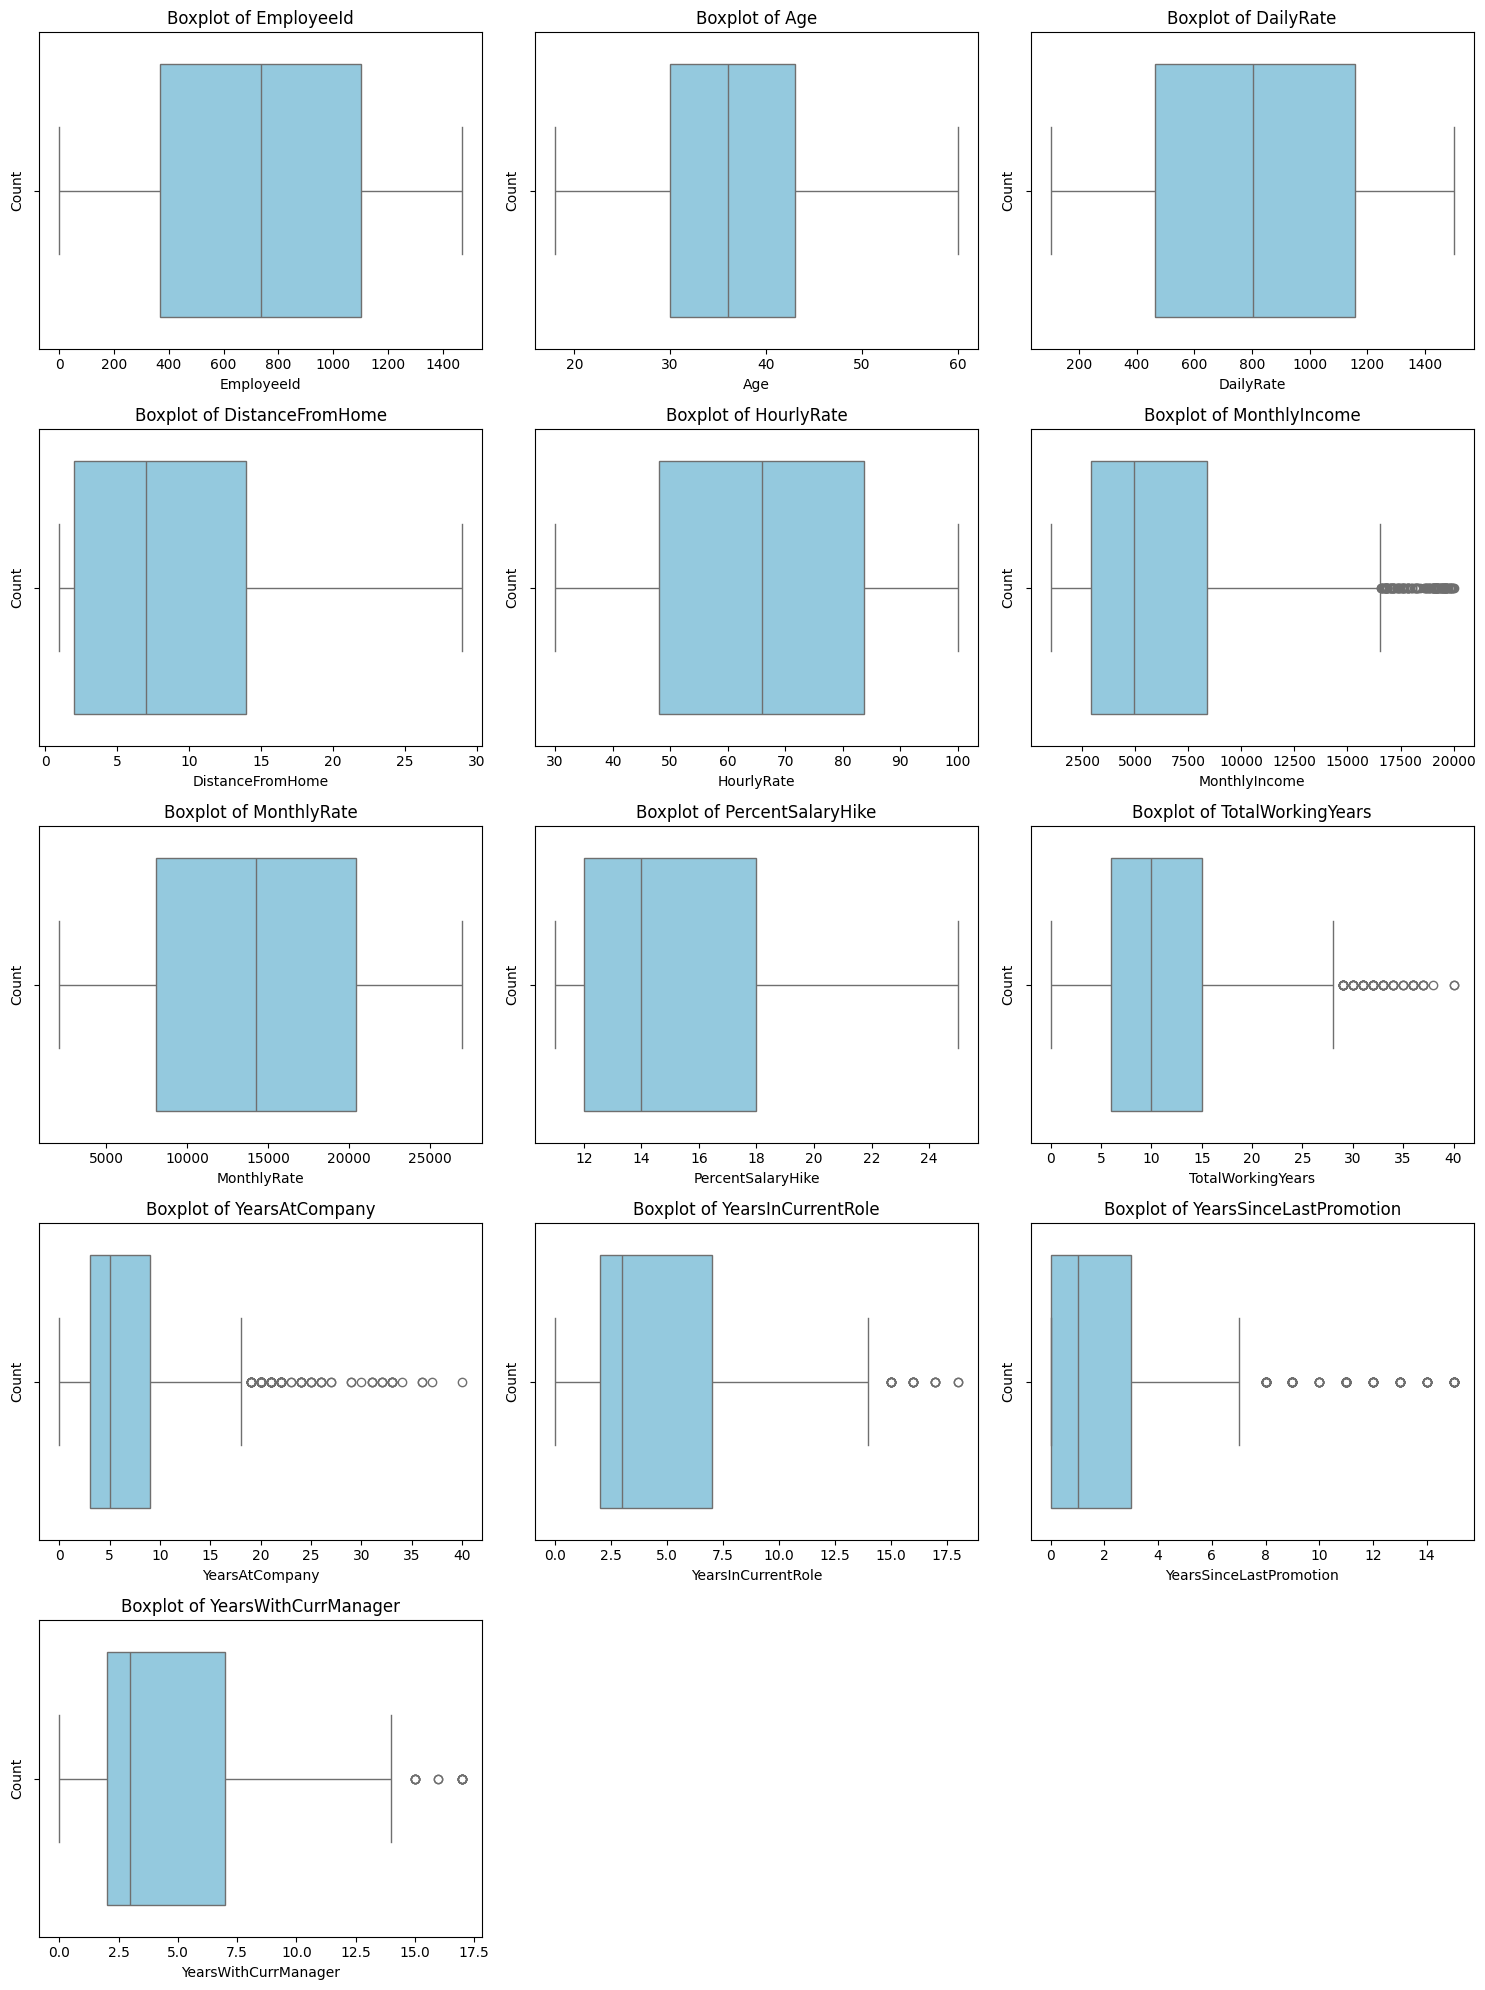

In [ ]:
# =======================================================
# periksa distribusi variabel numerik menggunakan boxplot
# =======================================================
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

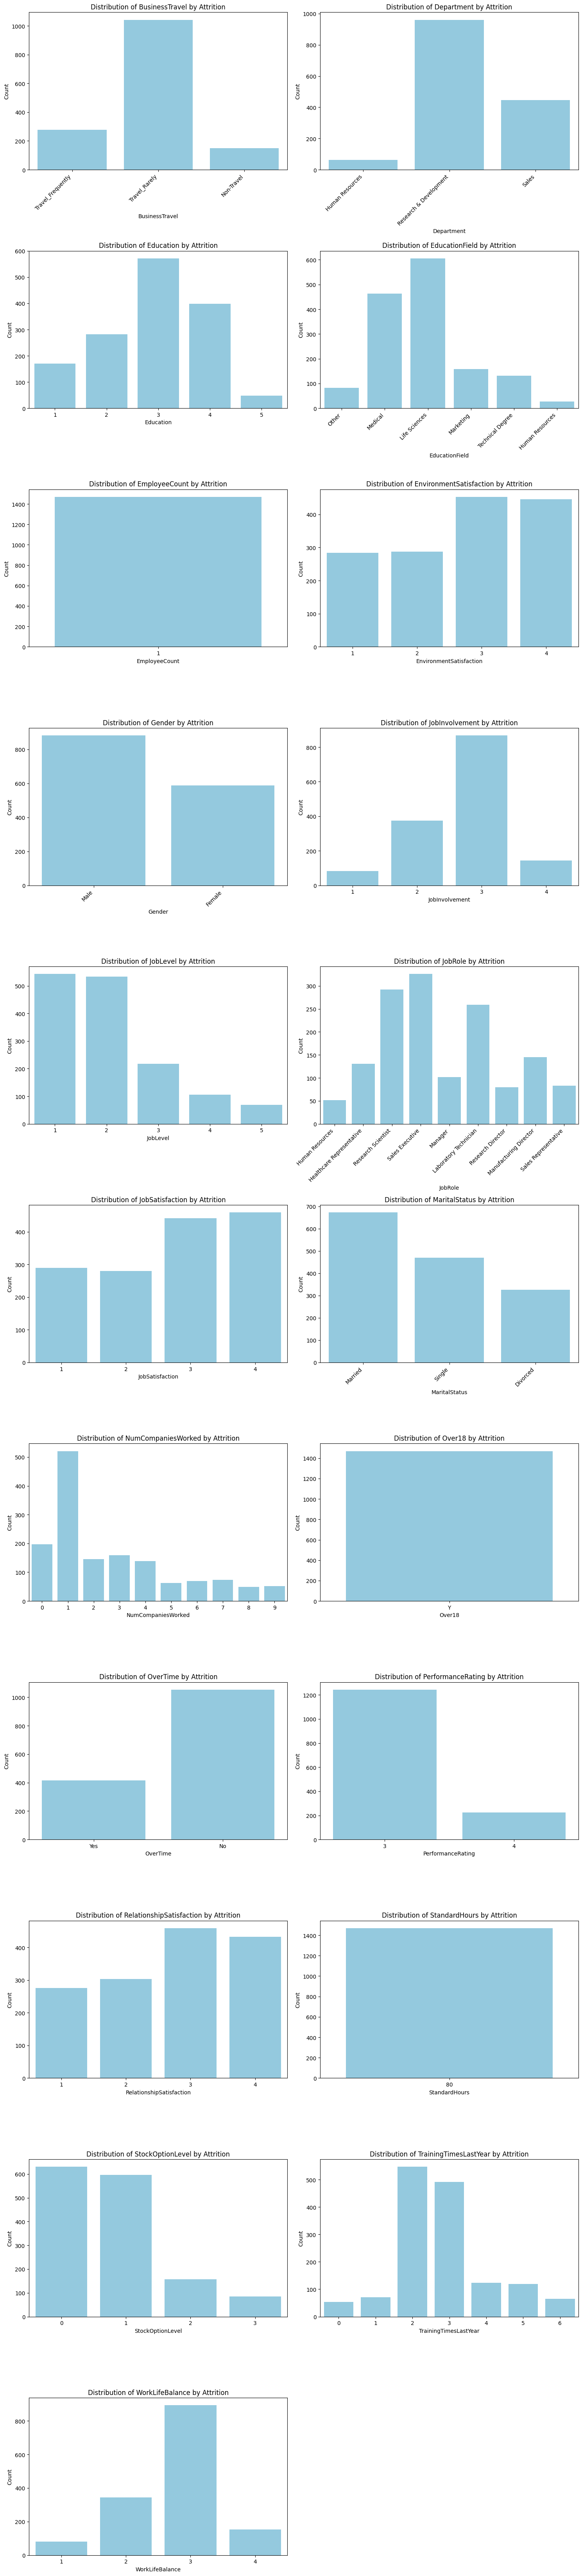

In [ ]:
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 6 * n_rows))

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, color='skyblue')
    # sns.countplot(data=df, x=col, hue='Attrition', palette='Set2')
    plt.title(f'Distribution of {col} by Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')

    # miringkan label non-numerik supaya ga tumpang tindih
    unique_vals = df[col].dropna().unique()
    # cek apakah isinya string dan bukan hanya 'yes'/'no' (dengan ignore case)
    is_all_string = all(isinstance(val, str) for val in unique_vals)
    unique_lower = set(val.lower() for val in unique_vals if isinstance(val, str))

    if is_all_string and not unique_lower.issubset({'y', 'yes', 'no'}):
        plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Insight:** <br>
- Terdapat data kategorikal yang hanya memiliki satu value unik (sehingga harus dihapus karena tidak akan memberi informasi berguna). Kolom-kolomnya yakni:
  - EmployeeCount
  - Over18
  - StandardHours

<br>

**Kolom yang harus di-drop:**
- EmployeeId
- EmployeeCount
- Over18
- StandardHours

In [ ]:
# drop kolom EmployeeId, EmployeeCount, Over18, dan StandardHours
df.drop(['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# hapus kolom EmployeeId, EmployeeCount, Over18, dan StandardHours dari numerical_columns dan categorical_columns
numerical_columns = [col for col in numerical_columns if col not in ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']]
categorical_columns = [col for col in categorical_columns if col not in ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']]

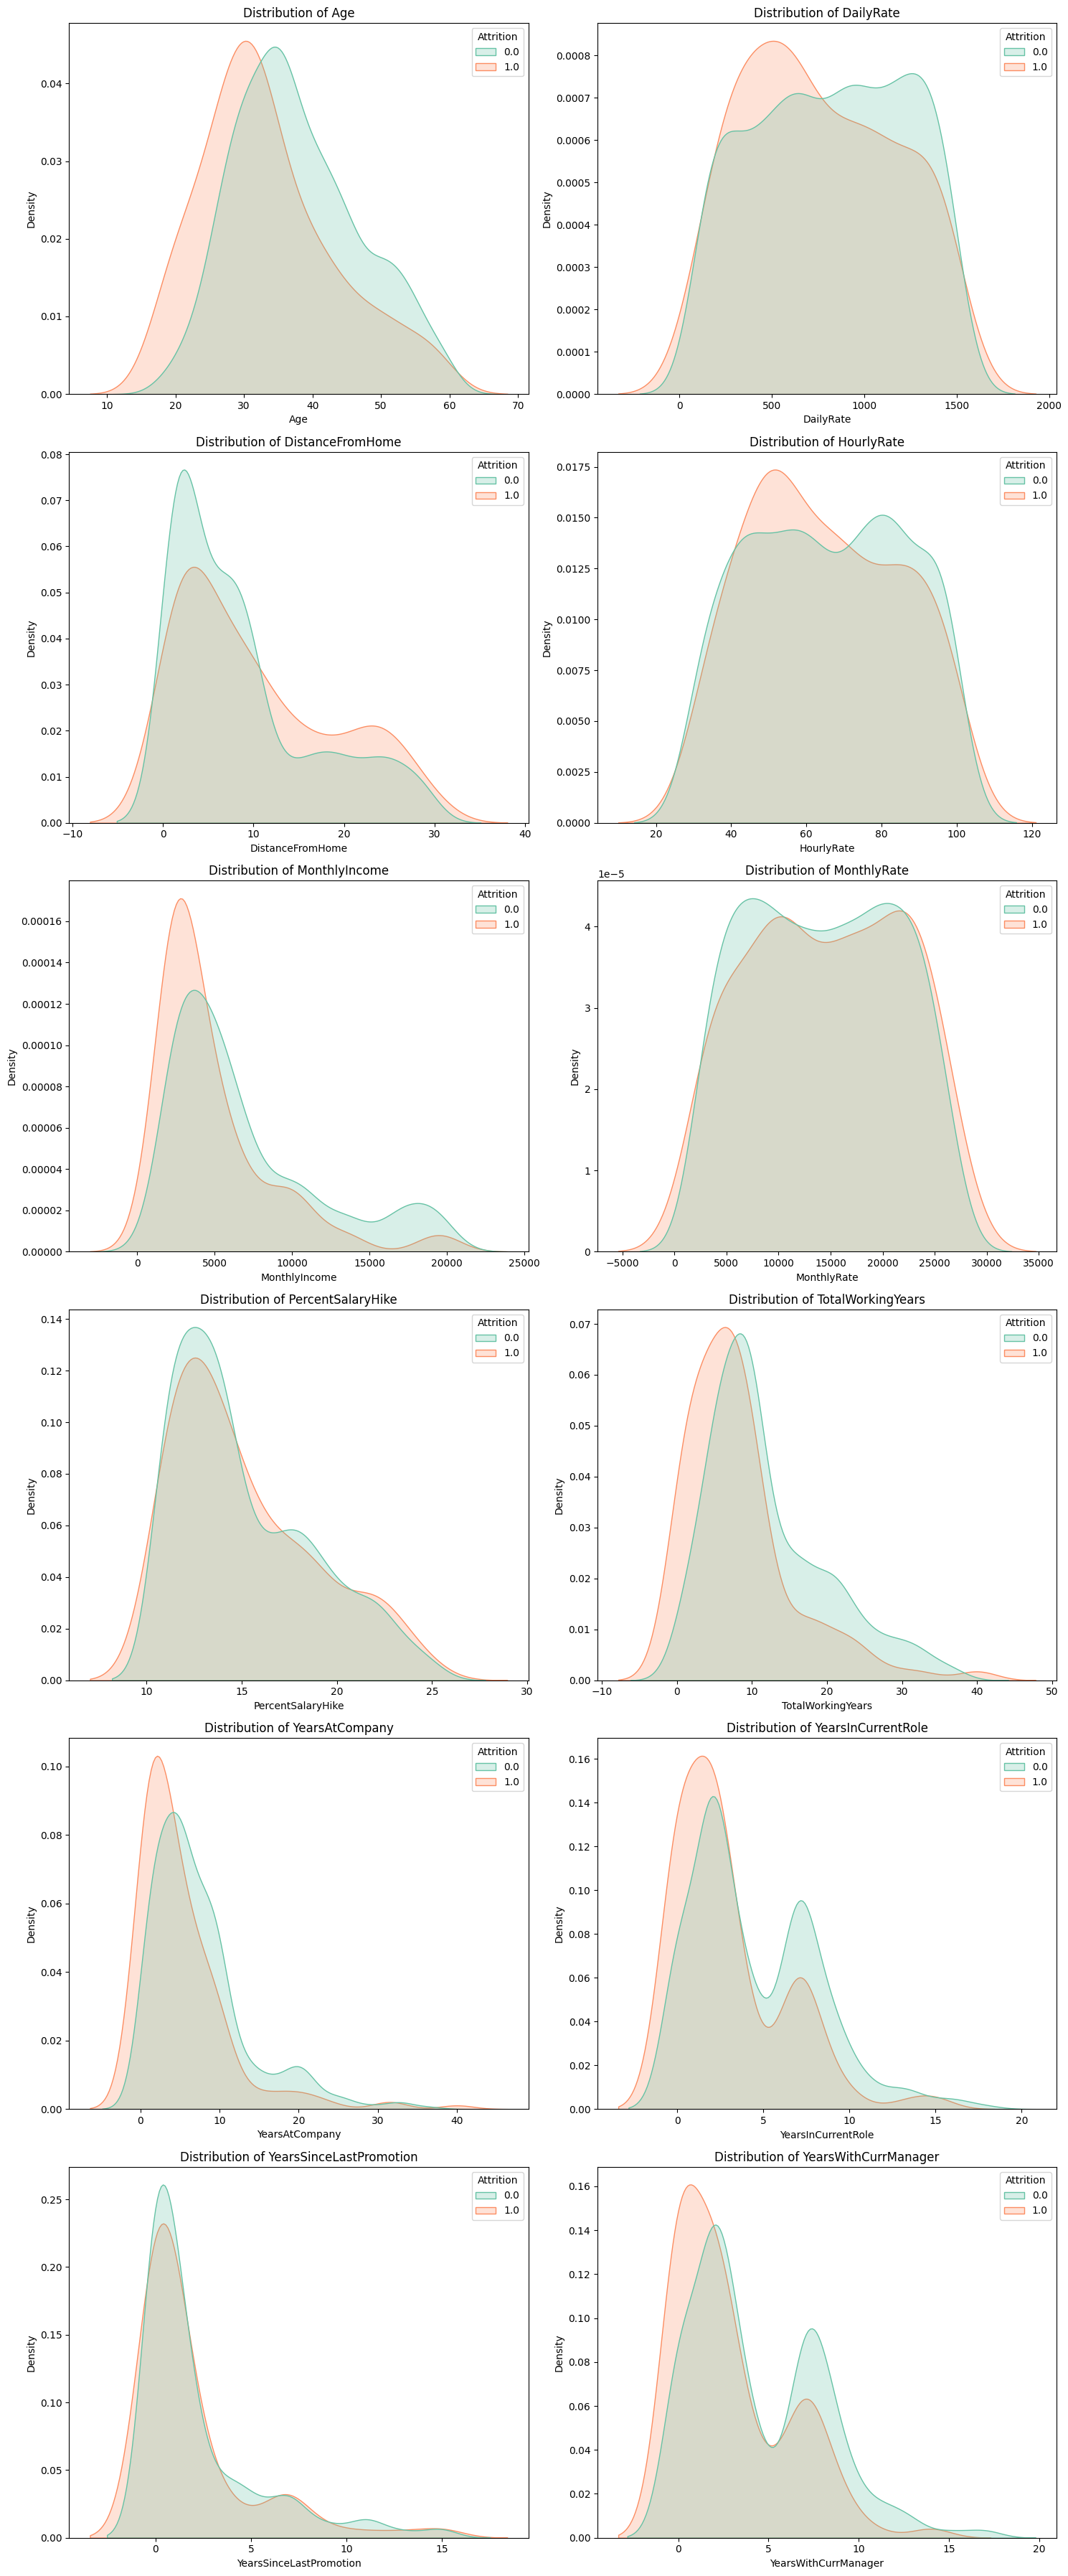

In [ ]:
# ====================================================
# plot distribusi data numerikal menggunakan histogram
# ====================================================
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
plt.figure(figsize=(15, 6 * n_rows))
for i, col in enumerate(numerical_columns):
  plt.subplot(n_rows, n_cols, i + 1)
  # sns.histplot(df[col], kde=True, color='skyblue')
  sns.kdeplot(data=df, x=col, hue='Attrition', common_norm=False, palette='Set2', fill=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.tight_layout()
plt.show()

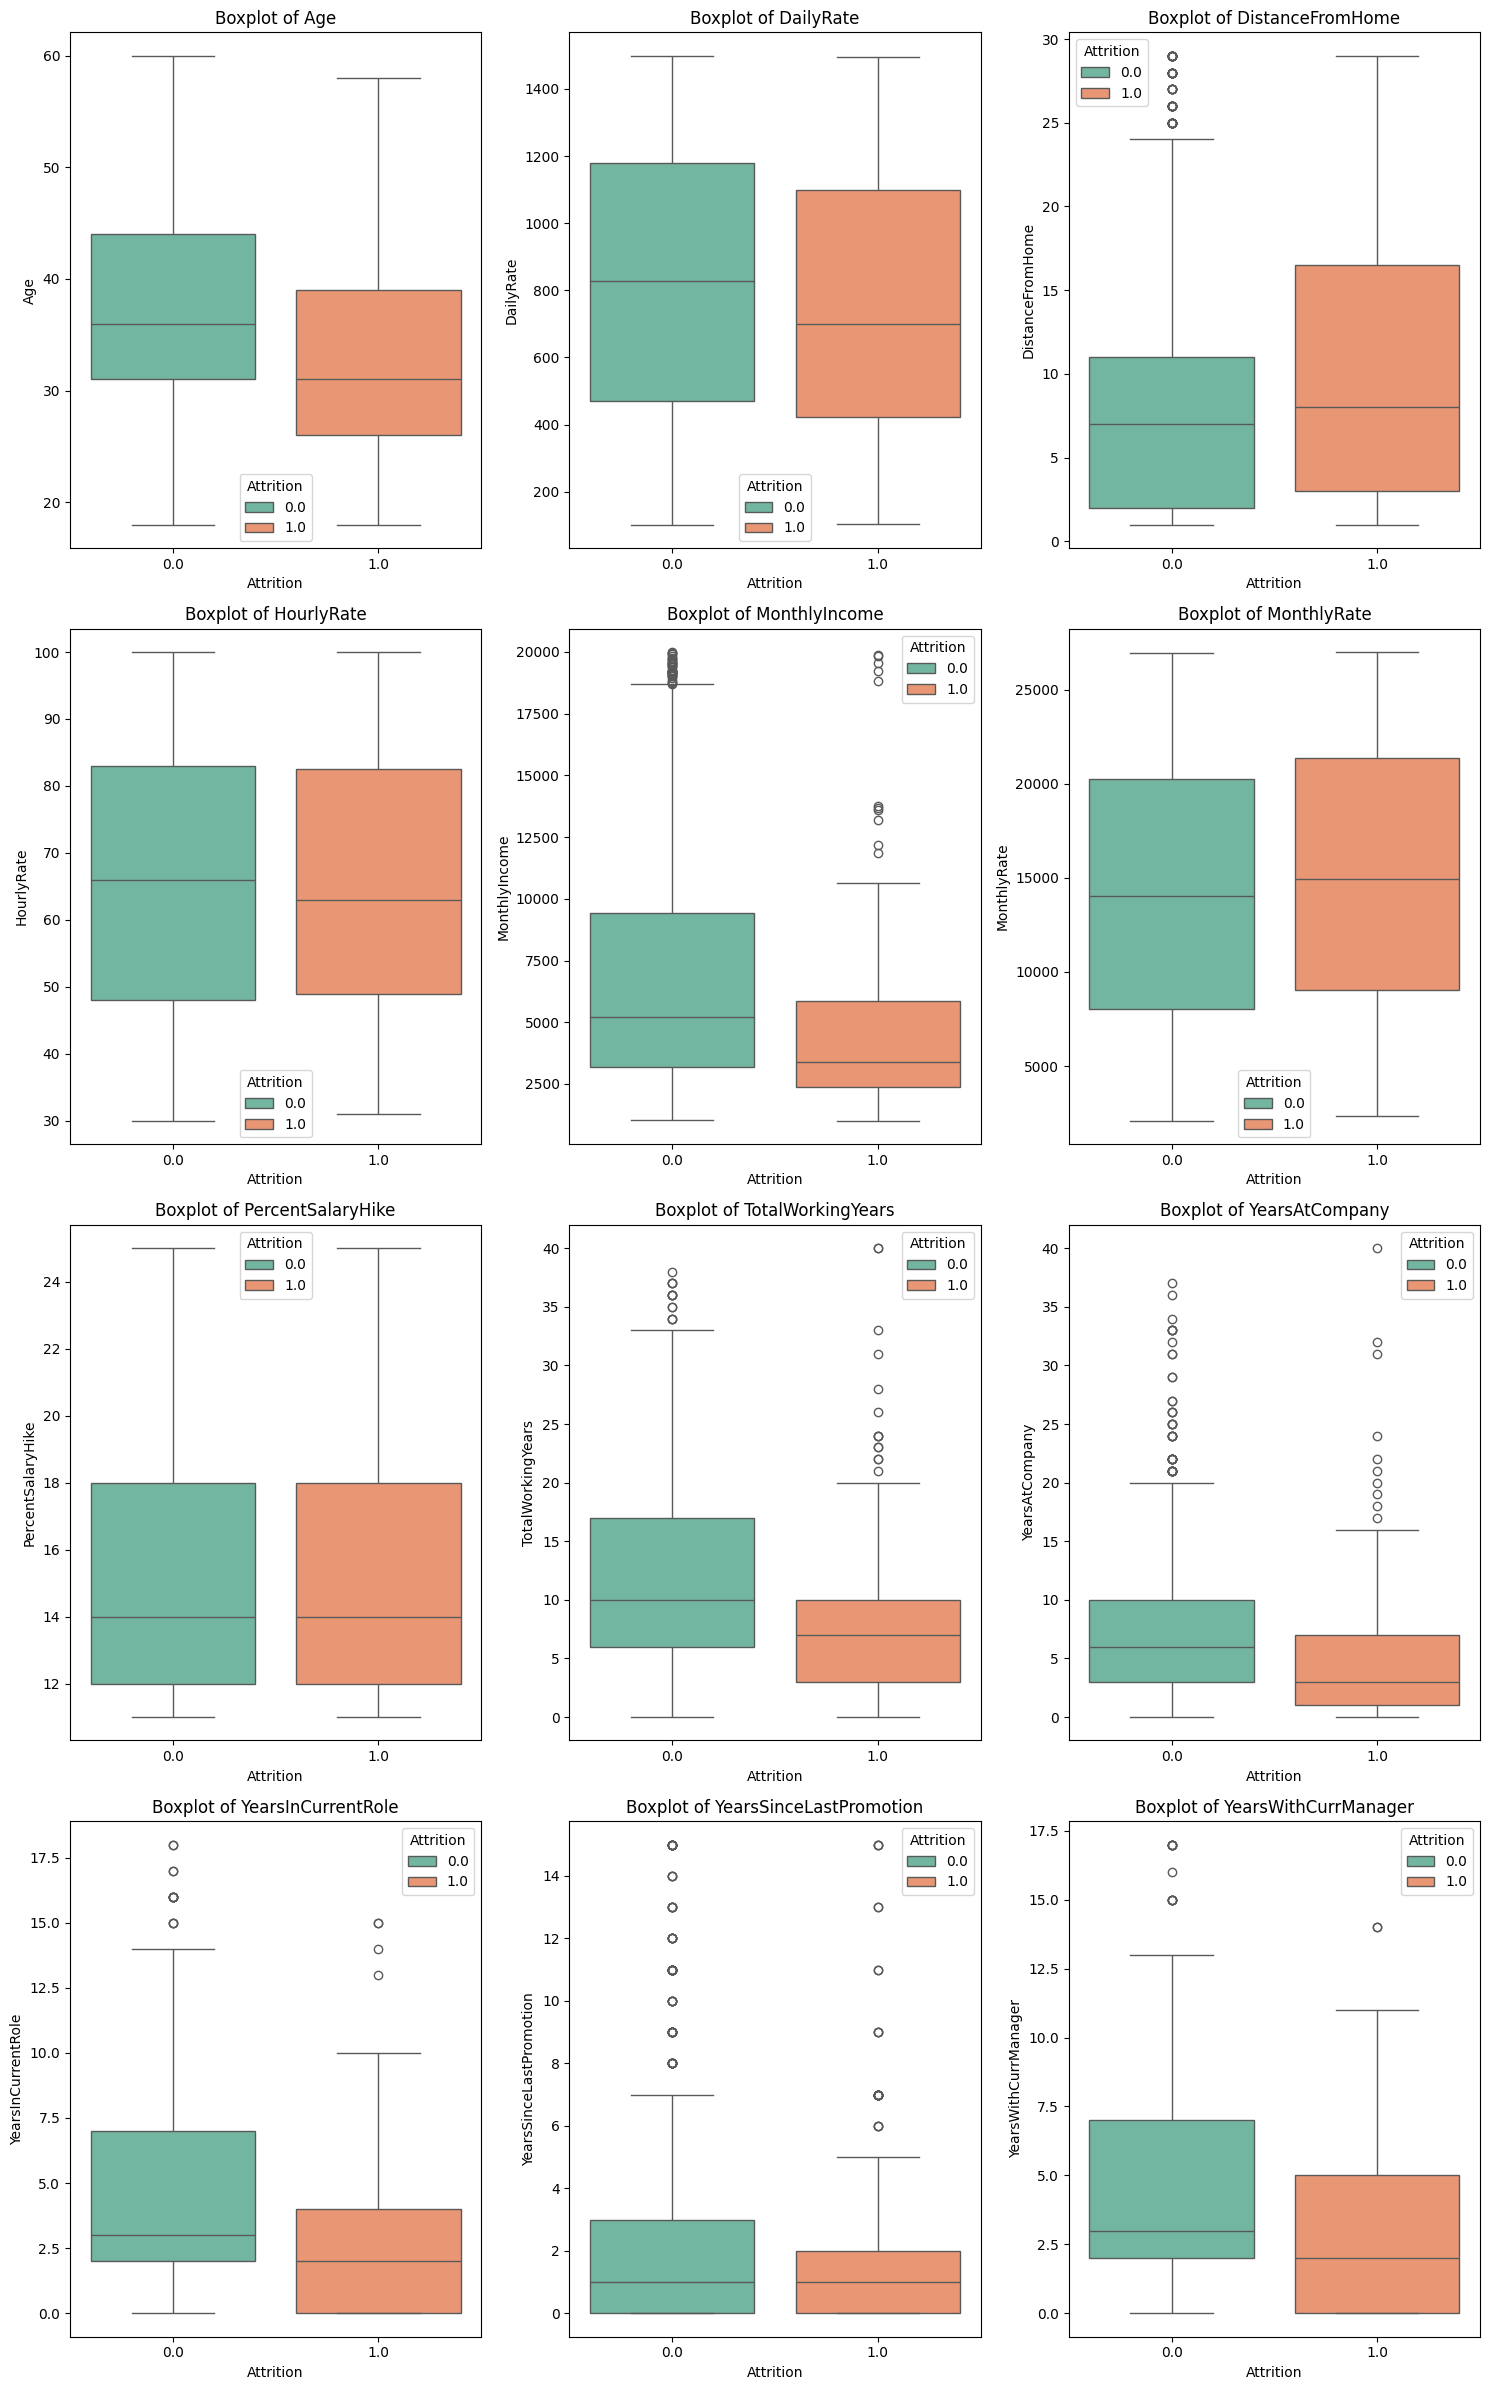

In [ ]:
# ========================================================================================================
# membandingkan distribusi variabel numerik pegawai yang attrition dan tidak attrition menggunakan boxplot
# ========================================================================================================
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 6 * n_rows))

for i, col in enumerate(numerical_columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.boxplot(x='Attrition', y=col, data=df, hue='Attrition', palette='Set2')
  plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

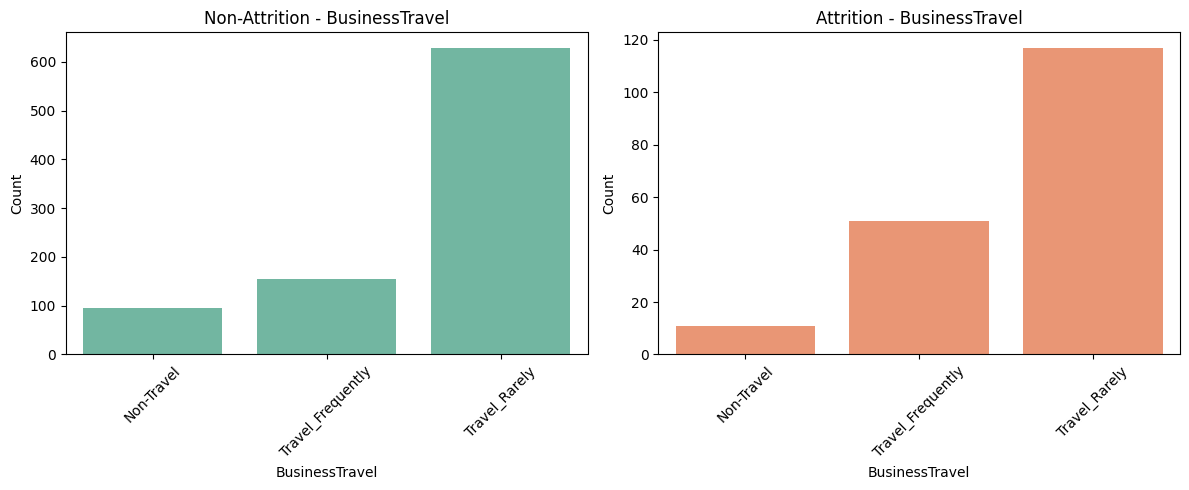

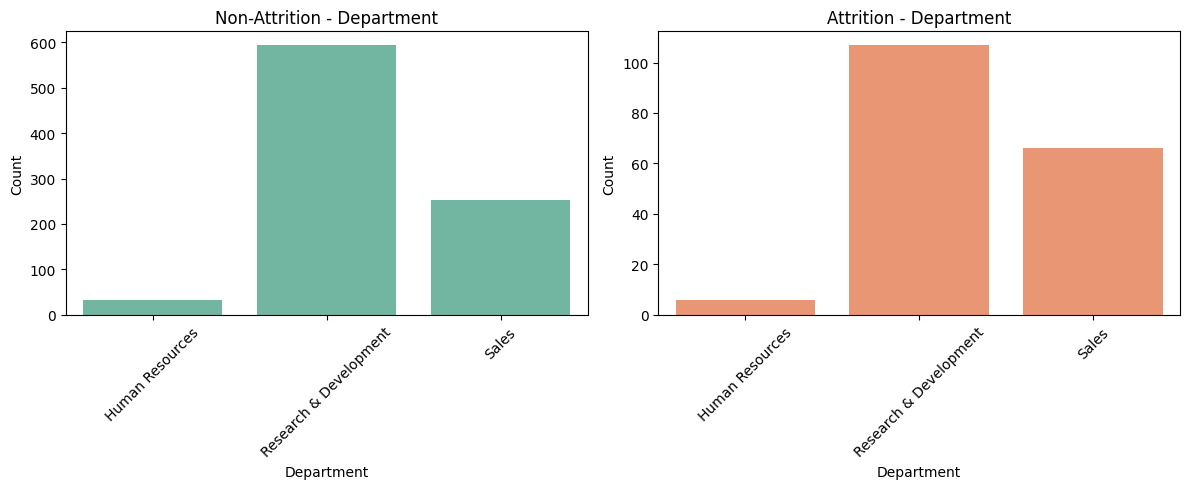

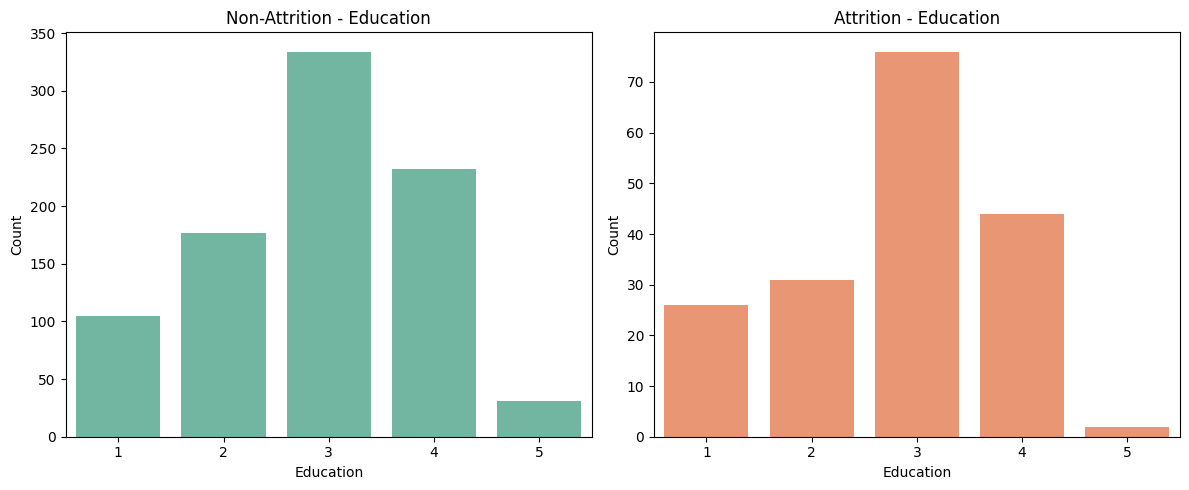

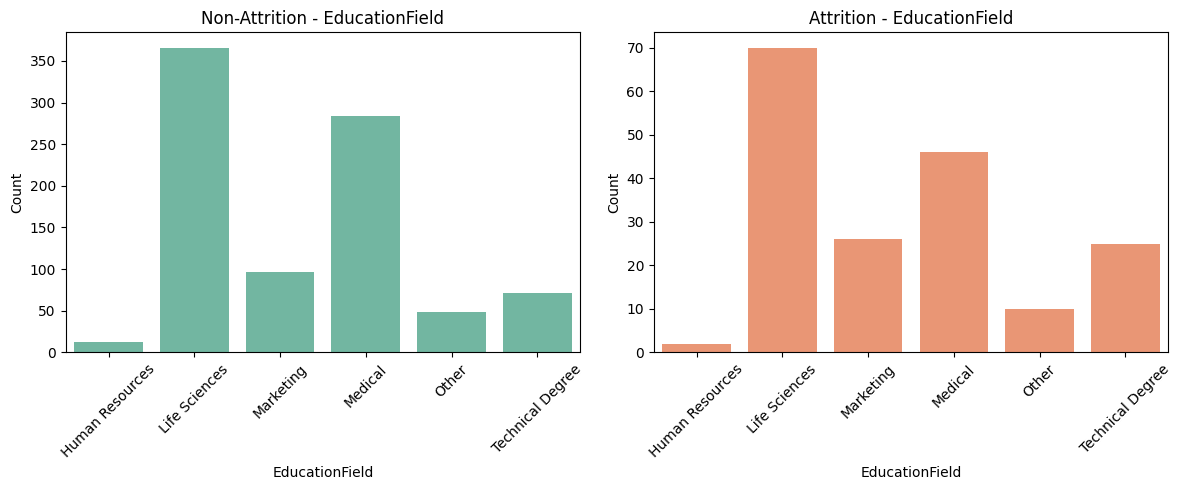

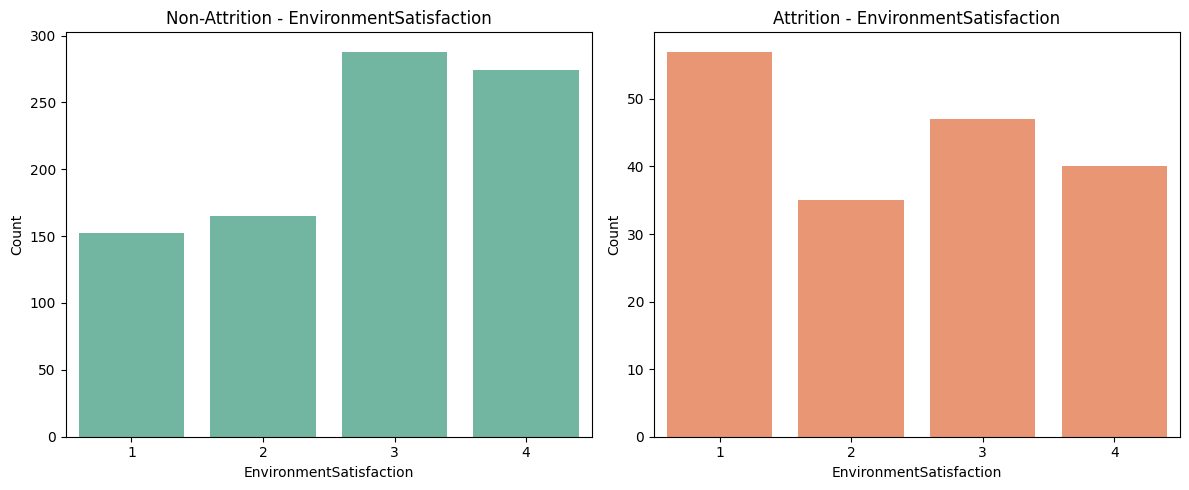

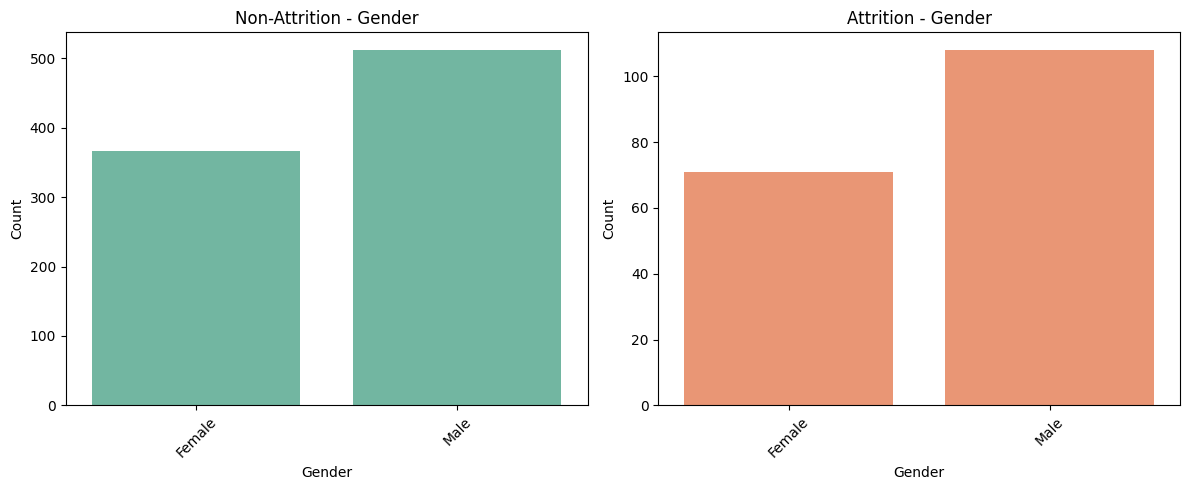

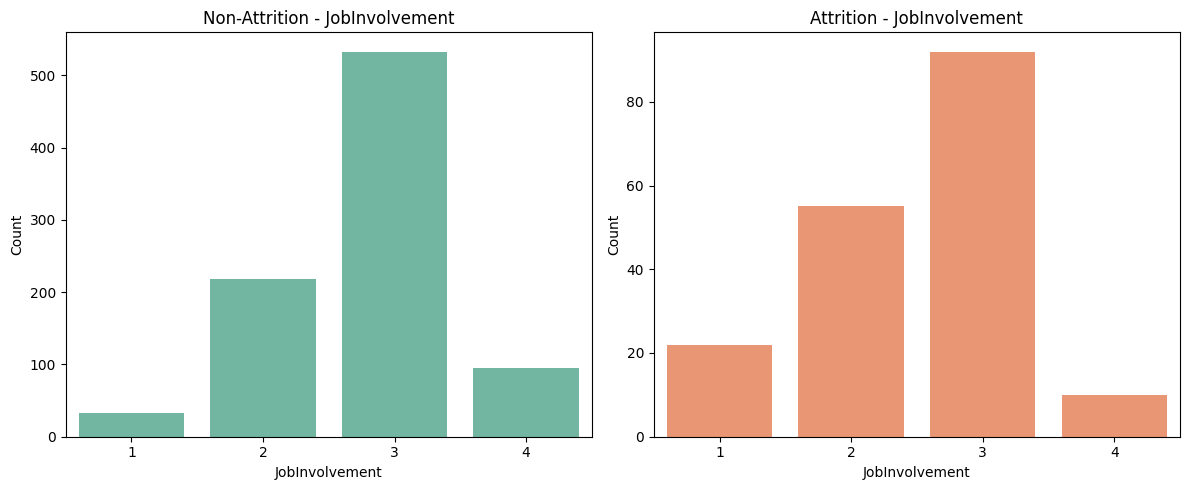

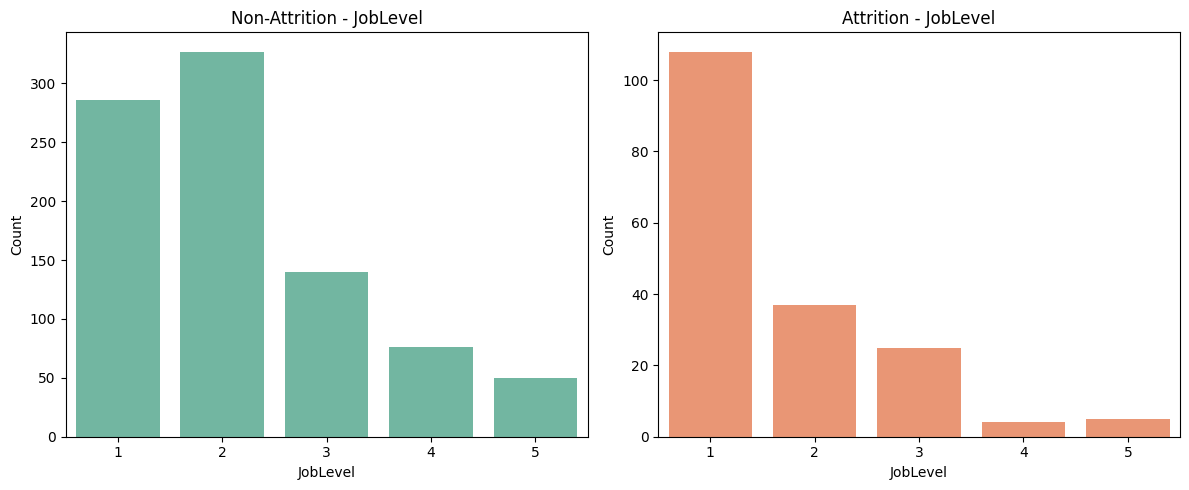

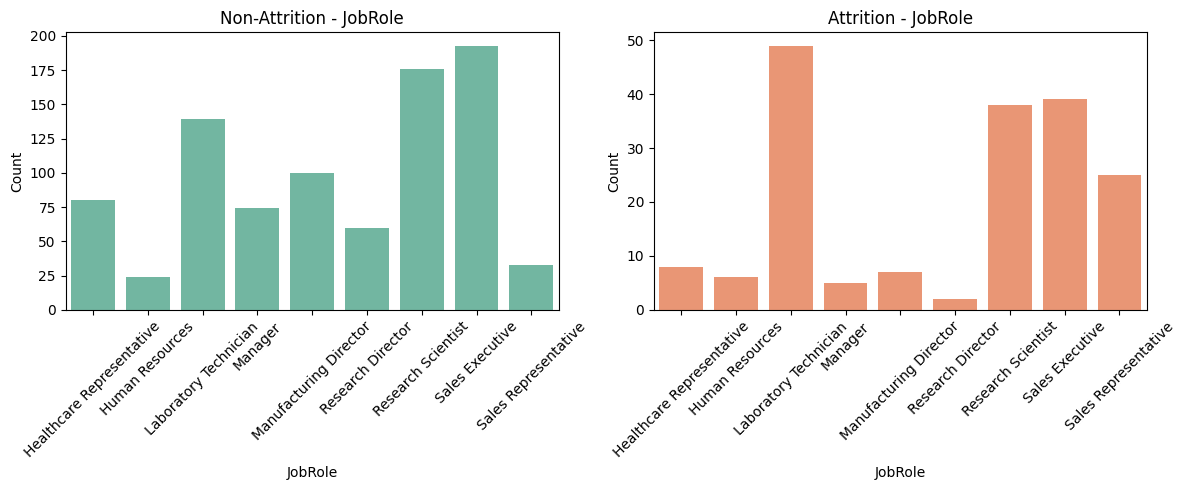

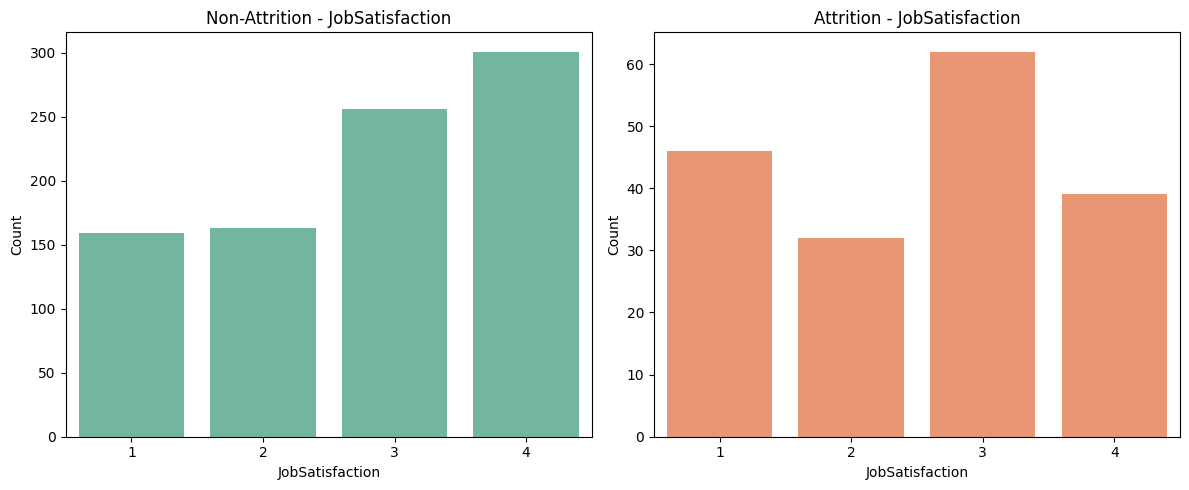

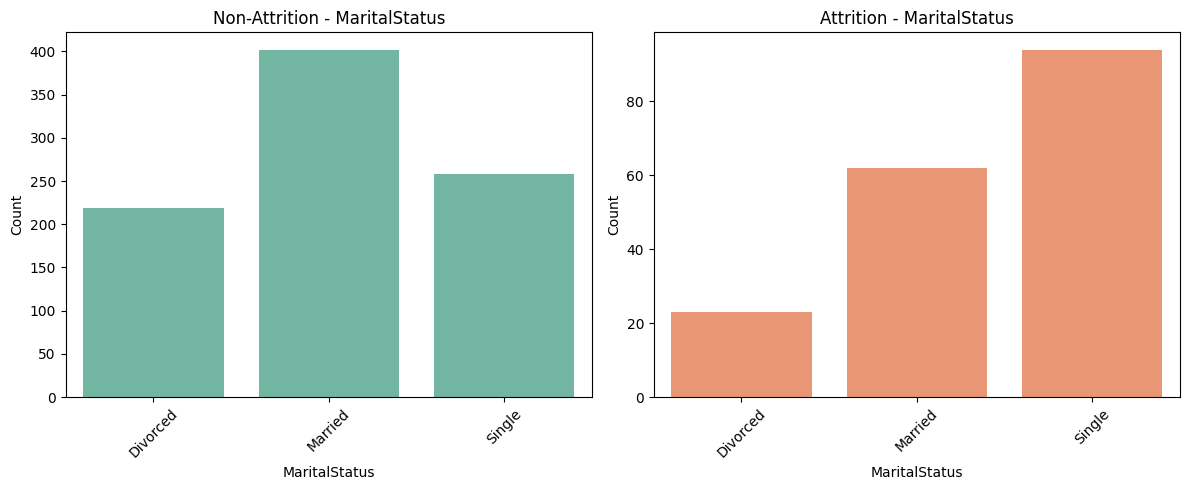

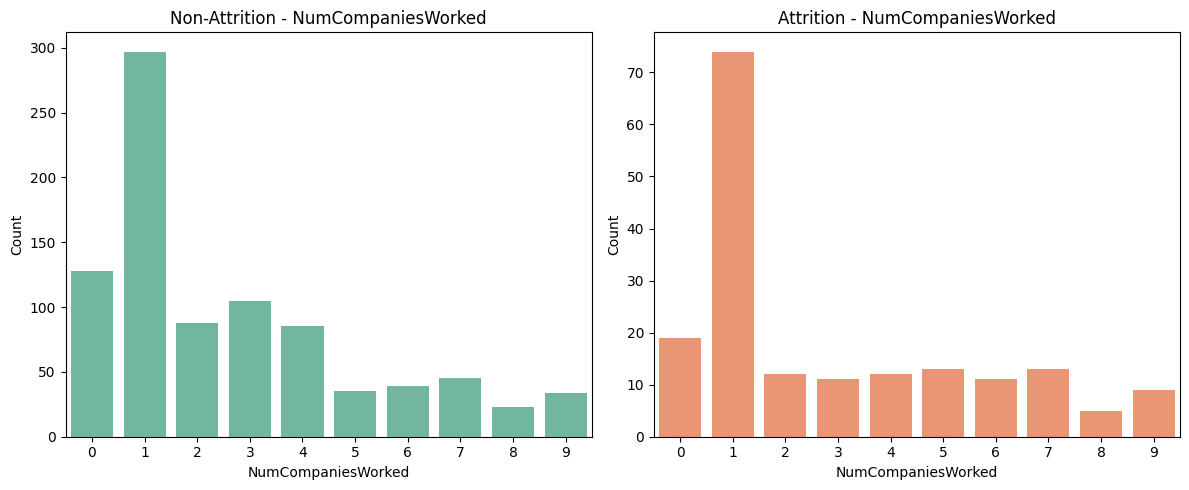

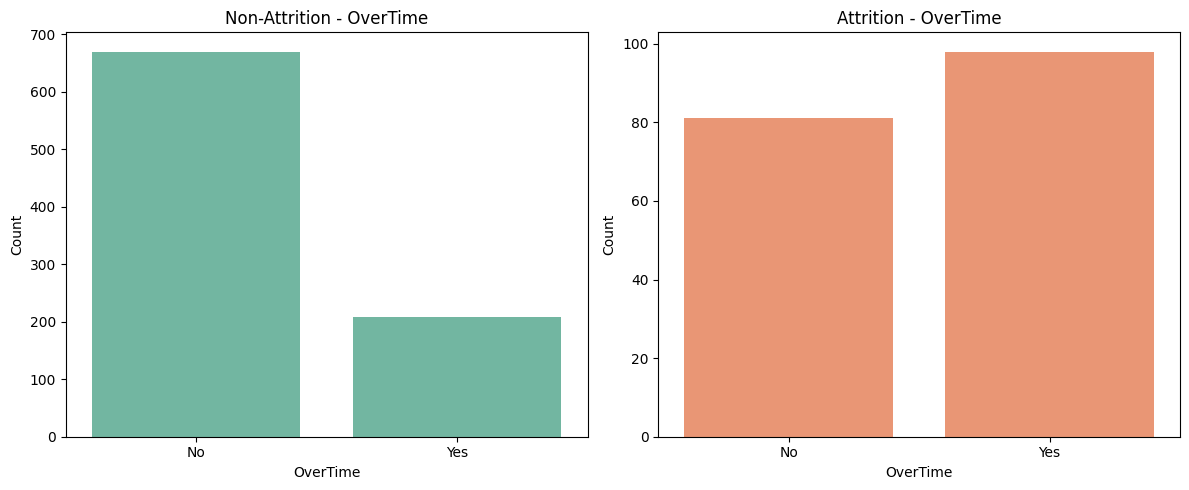

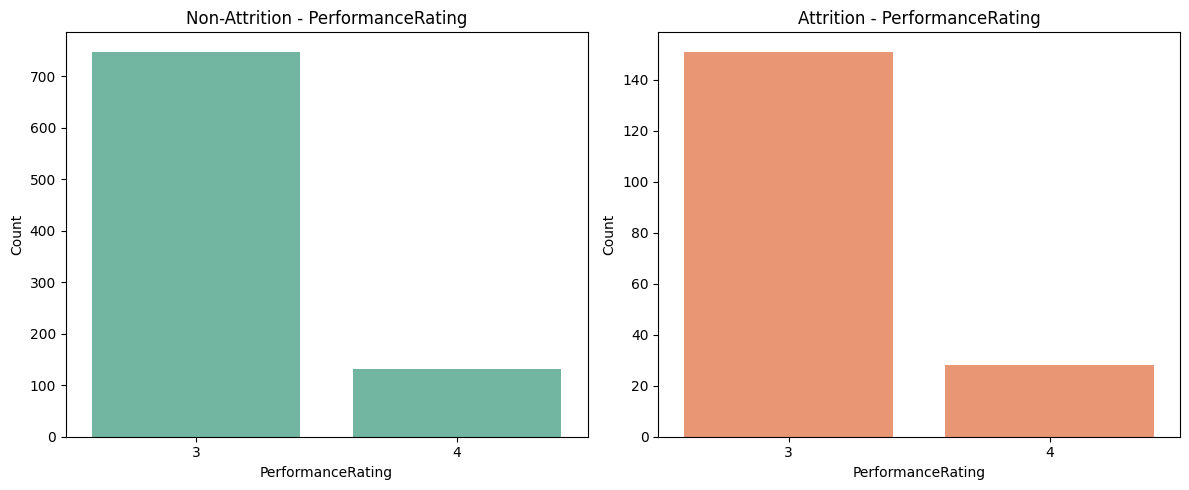

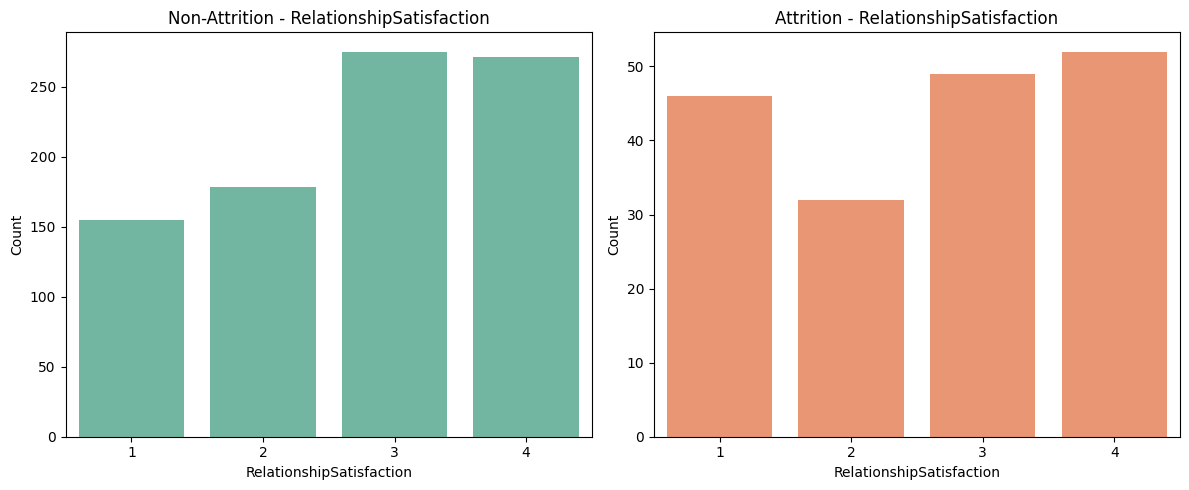

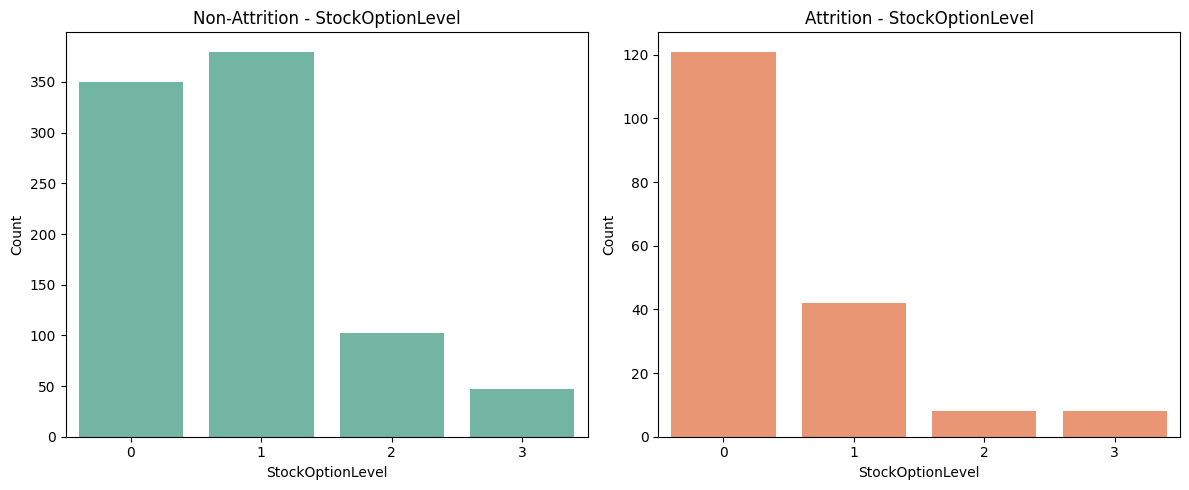

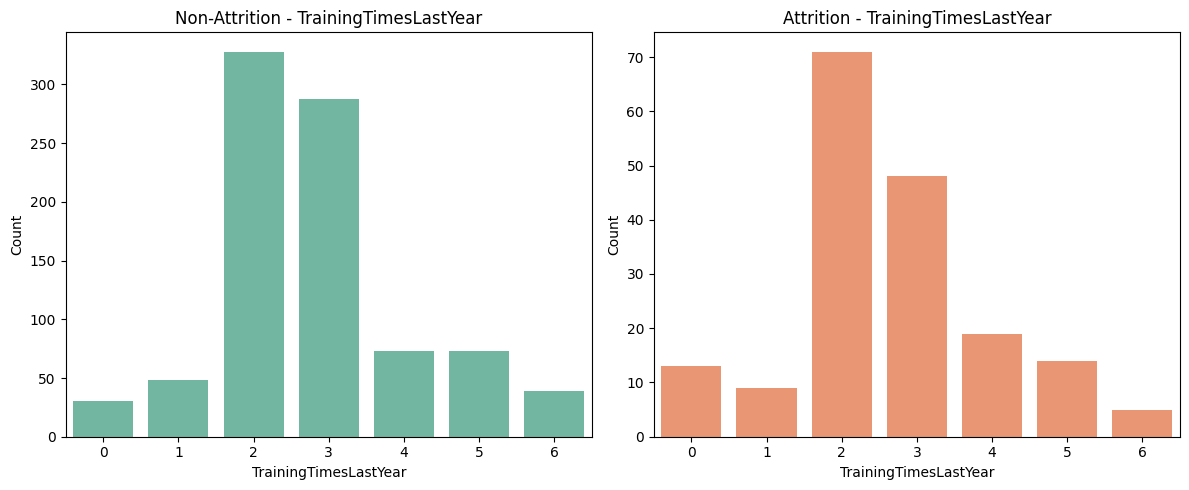

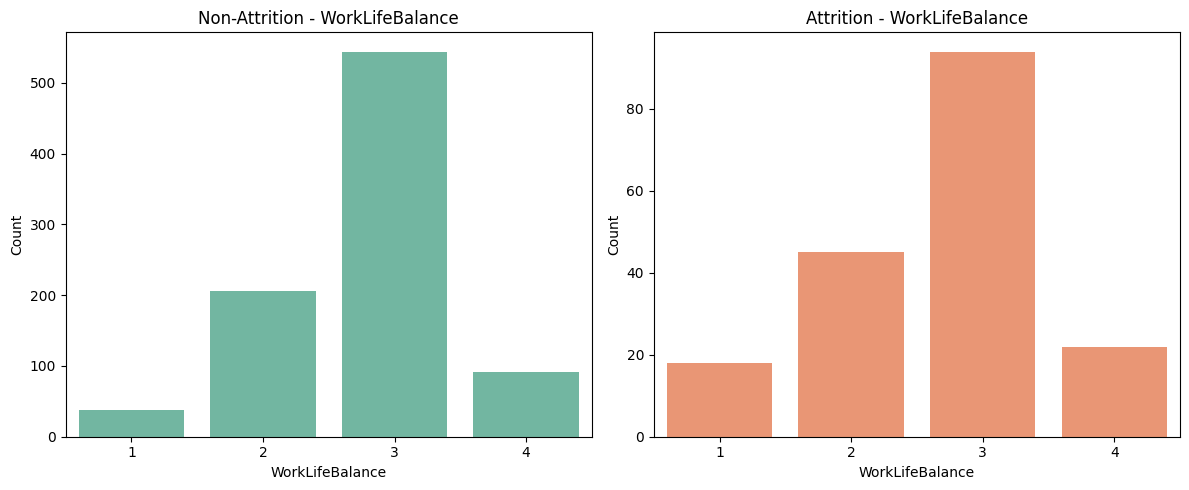

In [ ]:
# ======================================================================
# membandingkan distribusi data kategorikal berdasarkan status Attrition
# ======================================================================

# filter dataset berdasarkan status attrition
df_attrition = df[df['Attrition'] == 1]
df_non_attrition = df[df['Attrition'] == 0]

for col in categorical_columns:
    # urutkan label kategori: angka dulu jika bisa, string kalau tidak
    cat_order = sorted(df[col].dropna().unique(), key=lambda x: int(x) if str(x).isdigit() else str(x))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=False)

    # Non-Attrition (kiri)
    sns.countplot(data=df_non_attrition, x=col, ax=axes[0], color='#66C2A5', order=cat_order)
    axes[0].set_title(f'Non-Attrition - {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # Attrition (kanan)
    sns.countplot(data=df_attrition, x=col, ax=axes[1], color='#FC8D62', order=cat_order)
    axes[1].set_title(f'Attrition - {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Count')

    # miringkan label jika perlu
    is_all_string = all(isinstance(val, str) for val in cat_order)
    unique_lower = set(val.lower() for val in cat_order if isinstance(val, str))

    if is_all_string and not unique_lower.issubset({'y', 'yes', 'no'}):
        axes[0].tick_params(axis='x', rotation=45)
        axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

## Data Preparation / Preprocessing

Berdasarkan hasil EDA yang telah dilakukan sebelumnya, berikut urutan tindakan preprocessing yang harus dilakukan: <br>
1. Drop kolom yang tidak diperlukan
2. Bangun preprocessor yang isinya encoding dan normalisasi
3. Data Splitting dan terapkan preprocessor yang sudah dibangun di tahap 2

**1. DROP KOLOM YANG TIDAK DIPERLUKAN**

**Fitur yang Digunakan untuk Model:**
- Age
- MaritalStatus
- OverTime
- JobSatisfaction
- EnvironmentSatisfaction
- MonthlyIncome
- DistanceFromHome

**Target:**
- Attrition

In [ ]:
# drop semua kolom yang tidak diperlukan
df_model = df.drop([col for col in df.columns if col not in ['Age', 'MaritalStatus', 'OverTime', 'JobSatisfaction', 'EnvironmentSatisfaction', 'MonthlyIncome', 'DistanceFromHome', 'Attrition']], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1058 non-null   float64
 2   DistanceFromHome         1470 non-null   int64  
 3   EnvironmentSatisfaction  1470 non-null   int64  
 4   JobSatisfaction          1470 non-null   int64  
 5   MaritalStatus            1470 non-null   object 
 6   MonthlyIncome            1470 non-null   int64  
 7   OverTime                 1470 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 92.0+ KB


In [ ]:
# pisahkan dataframe antara yang punya missing value di kolom Attrition dengan yang tidak
df_model_labeled = df_model[df_model['Attrition'].notna()]
df_model_unlabeled = df_model[df_model['Attrition'].isna()]
# ubah ke csv, untuk diunduh buat prediksi pakai script nanti
df_model_unlabeled.to_csv('df_attrition_unlabeled.csv', index=False)
# tampilkan informasi dataset
df_model_labeled.info()
df_model_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1058 non-null   int64  
 1   Attrition                1058 non-null   float64
 2   DistanceFromHome         1058 non-null   int64  
 3   EnvironmentSatisfaction  1058 non-null   int64  
 4   JobSatisfaction          1058 non-null   int64  
 5   MaritalStatus            1058 non-null   object 
 6   MonthlyIncome            1058 non-null   int64  
 7   OverTime                 1058 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 74.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      412 non-null    int64  
 1   Attrition                0 no

**2. BANGUN PREPROCESSOR**

Pakai robustscaler soalnya ada dua kolom numerik yang punya banyak banget outlier seperti fitur MonthlyIncome.

In [ ]:
numerical_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome']
categorical_cols = ['MaritalStatus', 'OverTime', 'JobSatisfaction', 'EnvironmentSatisfaction']

In [ ]:
preprocessor = ColumnTransformer(transformers=[
  ('num', RobustScaler(), numerical_cols), # scale kolom numerik
  ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols) # encode kolom kategorikal
])

In [ ]:
# untuk oversampling, pakai smote
smote = SMOTE(random_state=0)

**3. DATA SPLITTING**

Bagi dataset ke train dan test set. Lalu terapkan preprocess dan oversampling pada train set, dan terapkan preprocess tanpa oversampling pada test set, sebab data test tidak boleh dimodifikasi.

In [ ]:
# pisahkan df_model_labeled menjadi fitur dan target
X = df_model_labeled.drop('Attrition', axis=1) # dataset fitur
y = df_model_labeled['Attrition'] # dataset target

# bagi dataset ke train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
# ket: pakai stratify=y supaya dataset seragam antara train dan test set berdasarkan target nya

# preprocessing dan oversampling data train
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# preprocessing data test (tanpa oversampling, soalnya data test tidak boleh dimodifikasi)
X_test_preprocessed = preprocessor.transform(X_test)

# tampilkan shape set latih dan uji
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (793, 7)
Shape of X_test: (265, 7)
Shape of y_train: (793,)
Shape of y_test: (265,)


## Modeling

Untuk model kita cobakan pakai algoritma machine learning untuk kasus klasifikasi, lalu bandingkan evaluasi masing-masing metriknya.

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_train_resampled, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)
svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_resampled, y_train_resampled)

print("Model selesai dilatih.")

Model selesai dilatih.


## Evaluation

In [ ]:
# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_preprocessed, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_preprocessed, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_preprocessed, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_preprocessed, y_test),
  'Support Vector Machine (svm)': evaluate_model(svm, X_test_preprocessed, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_preprocessed, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Evaluasi model klasifikasi:

                          Model  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression (lr)  0.724528   0.347826  0.711111  0.467153
1            Decision Tree (dt)  0.735849   0.288136  0.377778  0.326923
2            Random Forest (rf)  0.826415   0.484848  0.355556  0.410256
3     K-Nearest Neighbors (knn)  0.713208   0.298701  0.511111  0.377049
4  Support Vector Machine (svm)  0.788679   0.400000  0.488889  0.440000
5              Naive Bayes (nb)  0.679245   0.303922  0.688889  0.421769


Berdasarkan evaluasi di atas, algoritma Random Forest akan dipilih untuk model, karena akurasinya sudah cukup baik (0.82).

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier())
])

# fit ke data training
pipeline.fit(X_train, y_train)

# simpan pipeline model
joblib.dump(pipeline, 'model.pkl')

['model.pkl']